#### A company started to invest in digital marketing as a new way of their product promotions.For that they collected data and decided to carry out a study on it.
#### ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.
#### ● The company needs to check whether there is any dependency between the features “Region” and “Manager”.
#### Help the company to carry out their study with the help of data provided.

In [1]:
#importing packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency

In [2]:
#reading csv file
df=pd.read_csv("C:/Users/rakhi/Downloads/Sales_add.csv")
df

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [3]:
#checking null values
df.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

There are no null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
#coloumn names
df.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

#### The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

Here, hypothesis are:

Ho: There is no significance increase in sales after stepping into digital marketing.

H1: There is significance increase in sales after stepping into digital marketing.

In [6]:
t_score,p_val=ttest_rel(df['Sales_After_digital_add(in $)'],df['Sales_before_digital_add(in $)'])
print('t score=',t_score,'\np value=',p_val)
alpha  = 0.05
if p_val>=alpha:
    print("We fail to reject Ho based on the sample.\nThere is no increase in sales after stepping into digital marketing.")
else:
    print("We reject Ho based on the sample.\nThe sales has increased significantly after using digital marketing.")

t score= 12.09070525287017 
p value= 6.336667004575778e-11
We reject Ho based on the sample.
The sales has increased significantly after using digital marketing.


Text(0.5, 1.0, 'Sales before and after using digital marketing')

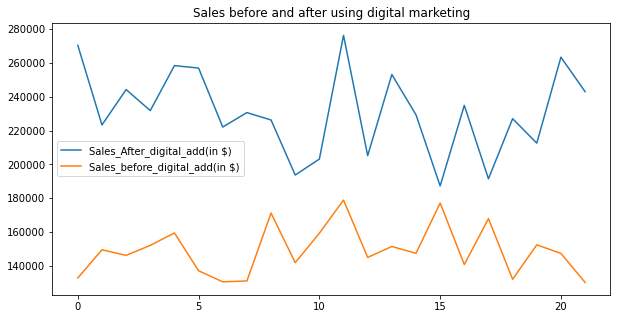

In [7]:
data=df[['Sales_After_digital_add(in $)','Sales_before_digital_add(in $)']]
data.plot(kind='line',figsize=(10,5))
plt.title('Sales before and after using digital marketing')

#### Whether there is any dependency between the features Region and Manager.

In [8]:
df1=pd.crosstab(df['Region'],df['Manager'])
df1

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


The hypotheses here are

Ho = There is no relationship between Region and Manager.

H1 = There is a relationship between Region and Manager.

In [9]:
statistic,p_val,df,exp = chi2_contingency(df1)
print('Chi squared statistic=',statistic,'\n\np value=',p_val,'\n\ndegrees of freedom=',df,'\n\nExpected values:',exp)

Chi squared statistic= 3.050566893424036 

p value= 0.5493991051158094 

degrees of freedom= 4 

Expected values: [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [10]:
alpha  = 0.05
if p_val>=alpha:
    print("We fail to reject Ho based on the sample.\nThere is no significant relationship between region and manager.")
else:
    print("We reject Ho based on the sample.\nThere is a relationship between region and manager.")

We fail to reject Ho based on the sample.
There is no significant relationship between region and manager.
